In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
digits = datasets.load_digits()
len(digits.target) # 1797 8x8 images represented as 1x64 arrays

1797

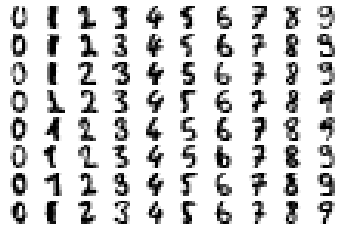

In [ ]:
import numpy as np
number_of_classes = len(np.unique(digits.target))
    
for cls in range(number_of_classes):
    idxs = np.where(digits.target == cls)[0]
    idxs = np.random.choice(idxs, 8, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(8, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(digits.images[idx], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.axis('off')

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

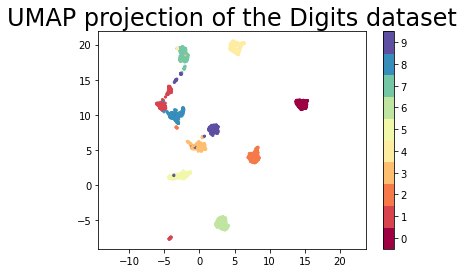

In [ ]:
import umap

# fits the 3-dimensional data to a 2-dimensional graph and calculates the distance between the clusters
# perserving their relationships

reducer = umap.UMAP(random_state=42) # create umap objetct
reducer.fit(digits.data) #fit the model to the training data
embedding = reducer.transform(digits.data) # embeds the data

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [ ]:
mean_imgs = np.array([digits.data[digits.target==i].mean(axis=0) for i in range(10)]) # mean per column aka a whole image for ALL images
len(mean_imgs)

10

In [ ]:
np.array([[1, 2], [2, 3]]).mean(axis=0)

array([1.5, 2.5])

In [ ]:
from numpy.linalg import norm
# norm for raw data
# sample_norms = np.array([norm(digits.data[digits.target == i], axis=0) for i in range(10)])
# len(sample_norms[0])
# length = 0
# for sample in sample_norms:
#   length += len(sample)
# length

every_image = np.array(digits.data[:])
every_image_norm = []
for image in every_image:
  every_image_norm.append(norm(image, axis=0))
len(every_image_norm)

1797

In [ ]:
mean_images_norms = np.array([norm(image) for image in mean_imgs])
mean_images_norms

array([57.21007138, 56.76243429, 56.13686576, 55.6744608 , 55.96995923,
       54.6351969 , 57.73202669, 54.9510358 , 57.26457834, 54.64989411])

In [ ]:
# norm for each image
# mean_imgs_norm = norm([mean_imgs[i] for i in range(10)], axis=1)
# for image in mean_imgs:
#   for value in image:

# mean_imgs_norm
# mean_imgs[9]

In [ ]:
# below gives one value
#from numpy import dot
#cos_sim = 1 - spatial.distance.cosine(data_norm, mean_images_norm)

img1 = digits.data[0]

img1_similarities = np.array([np.dot(img1, mean_imgs[i]) / (every_image_norm[0] * mean_images_norms[i]) for i in range(10)])

# below gives cosine similarity matrices
#similarities = np.dot(every_image_norm, mean_images_norms) / (every_image_norm * mean_images_norms)
img1_similarities

cos_sim = []
for index, image in enumerate(digits.data):
  img_array = []
  for number in range(10):
    img_array.append(([np.dot(image, mean_imgs[number]) / (every_image_norm[index] * mean_images_norms[number])]))
  cos_sim.append(img_array)
cos_sim[0][0][0]
len(cos_sim)

1797

In [ ]:
len(np.array([cosims[i] for cosims in cos_sim]))

1797

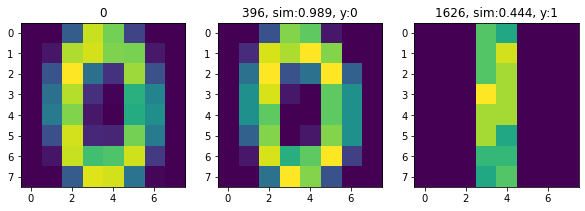

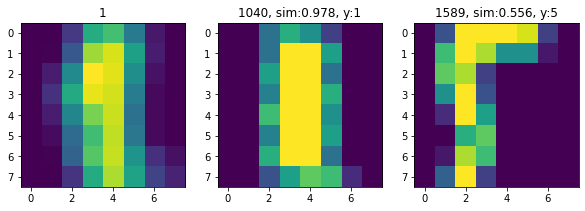

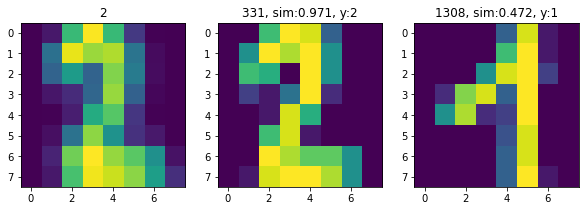

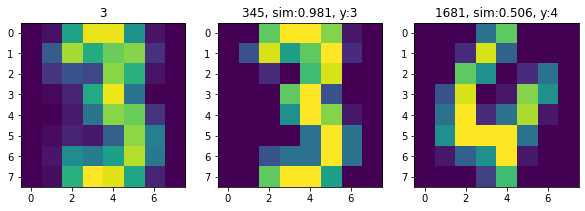

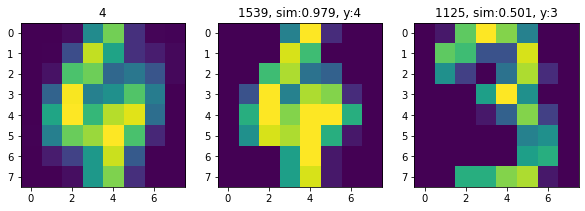

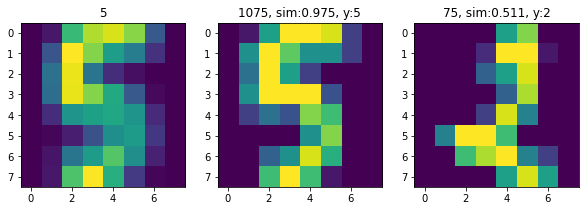

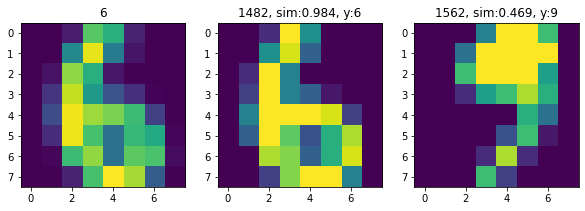

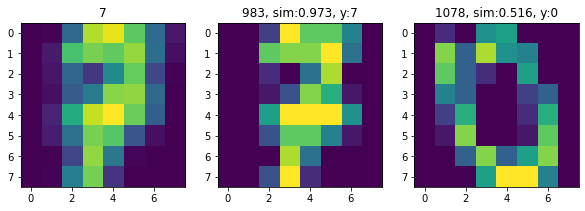

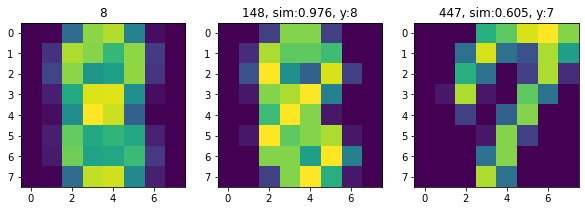

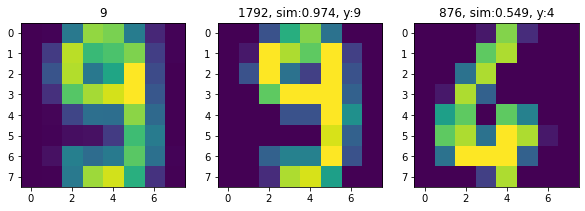

In [ ]:
for i in range(0, 10):

    sims = np.array([cosims[i] for cosims in cos_sim])

   # min_idx = np.argmin(cos_sim[:][i])
   # max_idx = np.argmax(cos_sim[i])

    min_idx = np.argmin(sims)
    max_idx = np.argmax(sims)


    fig, axs = plt.subplots(1,3,figsize=(10,10))
    
    # reference image
    axs[0].set_title(f"{i}")        
    axs[0].imshow(mean_imgs[i].reshape(8,8))
    
    # image and data with highest similarity to reference
   # axs[1].set_title(f"{max_idx}, sim:{similarities[max_idx, i]:.3f}, y:{digits.target[max_idx]}")

    axs[1].set_title(f"{max_idx}, sim:{cos_sim[max_idx][i][0]:.3f}, y:{digits.target[max_idx]}")
    axs[1].imshow(digits.data[max_idx].reshape(8,8))
    
    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, sim:{cos_sim[min_idx][i][0]:.3f}, y:{digits.target[min_idx]}")
    axs[2].imshow(digits.data[min_idx].reshape(8,8))

plt.show()

In [ ]:
X_train = digits.data[:int(len(digits.data)*0.7)]
Y_train = digits.target[:int(len(digits.data)*0.7)]
X_test = digits.data[len(X_train):]
Y_test = digits.target[len(X_train):]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, algorithm="brute")

classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute')

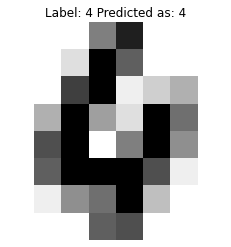

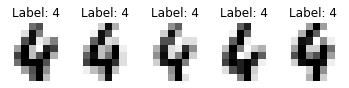

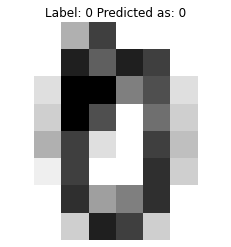

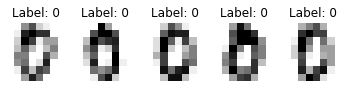

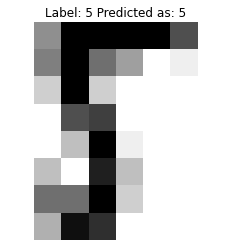

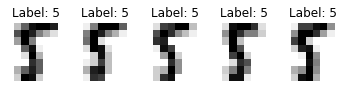

In [ ]:
predictions = classifier.predict(X_test)

(distances, neighbors) = classifier.kneighbors(X_test) 

images_and_predictions = list(zip(X_test, predictions))
# for index, (image, prediction) in enumerate(images_and_predictions[:4]):

for image_idx, (image, prediction) in enumerate(images_and_predictions[:3]):
  plt.subplot(1, 1, 1)
  plt.axis('off')
  plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Label: ' + str(Y_test[image_idx]) + ' Predicted as: ' + str(prediction))
  plt.show()
  for idx, neigh_idx in enumerate(neighbors[image_idx]):
    plt.subplot(1, 5, idx+1)
    plt.axis('off')
    plt.imshow(digits.data[neigh_idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % prediction)
  plt.show()


# print(distances)
# print(neighbors[0])
# len(neighbors)

In [ ]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



In [ ]:
metrics.confusion_matrix(Y_test, predictions)
metrics.confusion_matrix(predictions, Y_test)

array([[52,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 49,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 55,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 54,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 54,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 47,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 52]])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)

KMeans(n_clusters=10)

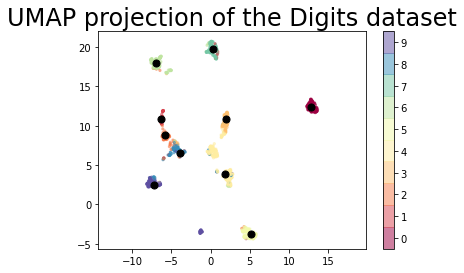

In [ ]:
reducer = umap.UMAP(random_state=42) # create umap objetct
#  #fit the model to the training data
embedding = reducer.fit_transform(X_train) # embeds the data
centers = kmeans.cluster_centers_


plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans.labels_, cmap='Spectral', s=5, alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

embedding2 = reducer.transform(centers)

y_kmeans = kmeans.predict(X_train)
# print(centers)
#plt.scatter(centers[:, 0].reshape(8,8), centers[:, 1].reshape(8,8), c='black', s=50, cmap='Spectral')
plt.scatter(embedding2[:, 0], embedding2[:, 1], c='black', s=50, cmap='Spectral')


# reducer = umap.UMAP(random_state=42) # create umap objetct
# reducer.fit(digits.data) #fit the model to the training data
# embedding = reducer.transform(digits.data) # embeds the data

# plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
# plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
# plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [ ]:
print("Completeness: " + str(metrics.completeness_score(Y_train, kmeans.labels_)))
print("homogeneity: " + str(metrics.homogeneity_score(Y_train, kmeans.labels_)))
print("Adjusted mutual information: " + str(metrics.adjusted_mutual_info_score(Y_train, kmeans.labels_)))

Completeness: 0.7668563180754101
homogeneity: 0.7484597815103053
Adjusted mutual information: 0.753993658395495


In [ ]:
predict_clusters = kmeans.predict(X_test)
print(metrics.classification_report(Y_test, predict_clusters))
print(metrics.confusion_matrix(Y_test, predict_clusters))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.68      0.32      0.44        53
           2       0.00      0.00      0.00        53
           3       0.04      0.04      0.04        53
           4       0.00      0.00      0.00        57
           5       0.04      0.04      0.04        56
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        54
           8       0.73      0.58      0.65        52
           9       0.00      0.00      0.00        55

    accuracy                           0.19       540
   macro avg       0.25      0.20      0.21       540
weighted avg       0.24      0.19      0.21       540

[[52  0  0  0  0  0  0  1  0  0]
 [ 0 17 35  1  0  0  0  0  0  0]
 [ 1  0  0  0  8  0  0  0  3 41]
 [ 0  0  2  2 39  0  3  0  7  0]
 [ 1  1  0  0  0  0  2 52  1  0]
 [ 0  0  0 39 13  2  0  2  0  0]
 [ 0  1  0  0  0 53  0  0  0  0]
 [ 0  0  5

Peer Review: Emil Gedenryd & Teodor Ahlinder